In [1]:
# Importando bibliotecas

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importando dataset

data = pd.read_csv('passing_cleaned.csv')

In [3]:
# Visualizando as 5 primeiras linhas da tabela

data.head()

,Unnamed: 0,Player,Tm,Age,G,GS,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,1D,Lng,Y/A,AY/A,Y/C,Y/G,Rate,Sk,Yds-s,Sk%,NY/A,ANY/A,Year
0,0,Kurt Warner,STL,30,16,16,375,546,68.7,4830,36,6.6,22,4.0,233,65,8.8,8.4,12.9,301.9,101.4,38,233,6.5,7.87,7.41,2001
1,1,Peyton Manning,IND,25,16,16,343,547,62.7,4131,26,4.8,23,4.2,201,86,7.6,6.6,12.0,258.2,84.1,29,232,5.0,6.77,5.88,2001
2,2,Brett Favre,GNB,32,16,16,314,510,61.6,3921,32,6.3,15,2.9,187,67,7.7,7.6,12.5,245.1,94.1,22,151,4.1,7.09,7.02,2001
3,3,Aaron Brooks,NOR,25,16,16,312,558,55.9,3832,26,4.7,22,3.9,182,63,6.9,6.0,12.3,239.5,76.4,50,330,8.2,5.76,4.99,2001
4,4,Rich Gannon,OAK,36,16,16,361,549,65.8,3828,27,4.9,9,1.6,195,49,7.0,7.2,10.6,239.3,95.5,27,155,4.7,6.38,6.61,2001


In [4]:
# Excluindo coluna unnamed
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,Player,Tm,Age,G,GS,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,1D,Lng,Y/A,AY/A,Y/C,Y/G,Rate,Sk,Yds-s,Sk%,NY/A,ANY/A,Year
0,Kurt Warner,STL,30,16,16,375,546,68.7,4830,36,6.6,22,4.0,233,65,8.8,8.4,12.9,301.9,101.4,38,233,6.5,7.87,7.41,2001
1,Peyton Manning,IND,25,16,16,343,547,62.7,4131,26,4.8,23,4.2,201,86,7.6,6.6,12.0,258.2,84.1,29,232,5.0,6.77,5.88,2001
2,Brett Favre,GNB,32,16,16,314,510,61.6,3921,32,6.3,15,2.9,187,67,7.7,7.6,12.5,245.1,94.1,22,151,4.1,7.09,7.02,2001
3,Aaron Brooks,NOR,25,16,16,312,558,55.9,3832,26,4.7,22,3.9,182,63,6.9,6.0,12.3,239.5,76.4,50,330,8.2,5.76,4.99,2001
4,Rich Gannon,OAK,36,16,16,361,549,65.8,3828,27,4.9,9,1.6,195,49,7.0,7.2,10.6,239.3,95.5,27,155,4.7,6.38,6.61,2001


In [19]:
# Criando agrupamentos por idade
bins = [20, 25, 30, 35, 40, 45]
labels = ['Abaixo de 25 anos', '25-30 anos', '30-35 anos', '35-40 anos', 'Mais de 40 anos']
data['Faixas'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

In [23]:
# Calculando a média de jardas passadas por faixa etária
media_jardas_faixa_etaria = data.groupby('Faixas', observed=False)['Yds'].mean()
media_jardas_faixa_etaria

Faixas
Abaixo de 25 anos    1065.935606
25-30 anos           1093.473535
30-35 anos           1390.900563
35-40 anos           1587.658416
Mais de 40 anos      1608.857143
Name: Yds, dtype: float64

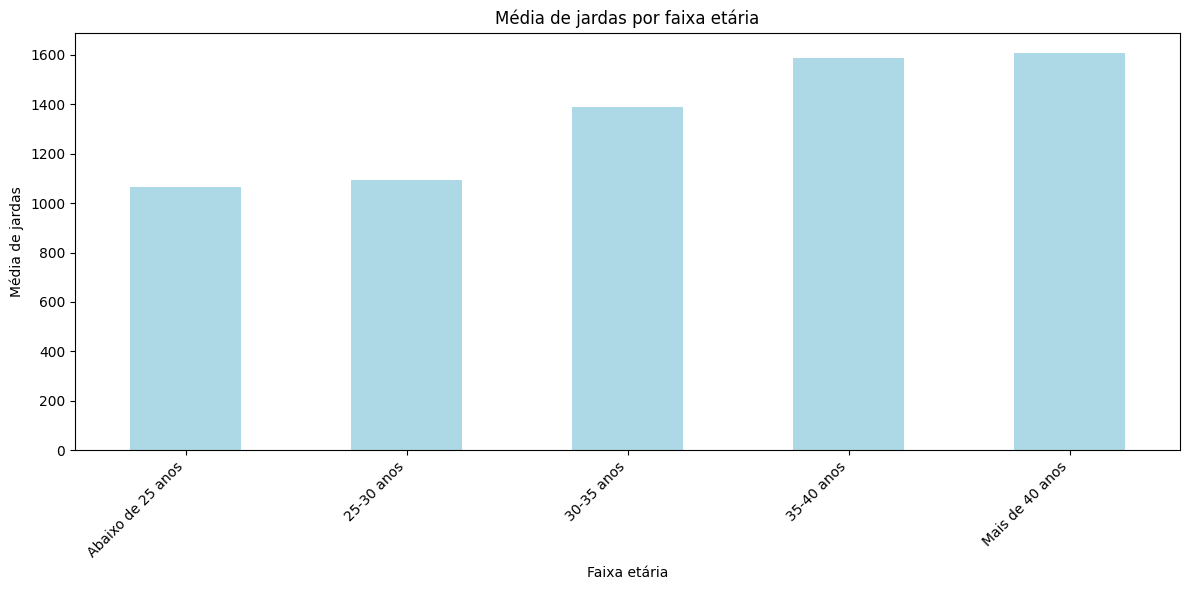

In [29]:
# Plotando gráfico de barras com a média de jardas passadas por faixa etária
plt.figure(figsize=(12,6))
media_jardas_faixa_etaria.plot(kind='bar', color='lightblue')
plt.title('Média de jardas por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Média de jardas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
# Calculando a média de touchdowns por faixa etária
media_td_faixa_etaria = data.groupby('Faixas', observed=False)['TD'].mean()
media_td_faixa_etaria

Faixas
Abaixo de 25 anos     5.998106
25-30 anos            6.703214
30-35 anos            8.658537
35-40 anos            9.891089
Mais de 40 anos      11.142857
Name: TD, dtype: float64

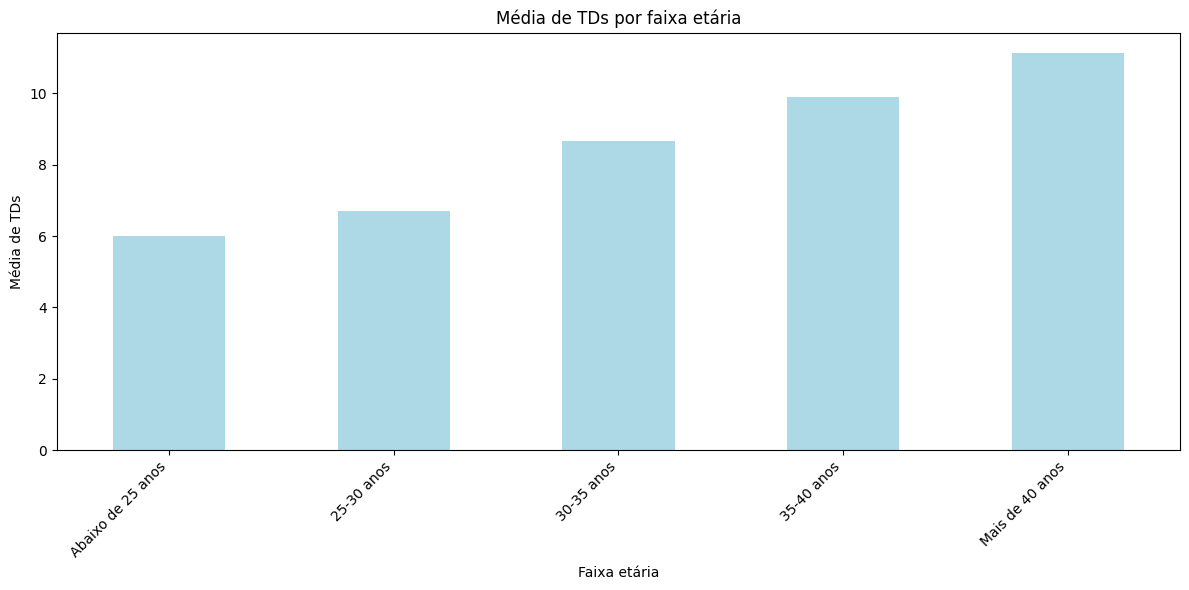

In [30]:
# Plotando gráfico de barras com a média de touchdowns por faixa etária
plt.figure(figsize=(12,6))
media_td_faixa_etaria.plot(kind='bar', color='lightblue')
plt.title('Média de TDs por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Média de TDs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [61]:
# Calculando a média de sacks por faixa etária
media_sack_faixa_etaria = data.groupby('Faixas', observed=False)['Sk'].mean()
media_sack_faixa_etaria

Faixas
Abaixo de 25 anos    12.229167
25-30 anos           10.978261
30-35 anos           12.489681
35-40 anos           12.707921
Mais de 40 anos      10.571429
Name: Sk, dtype: float64

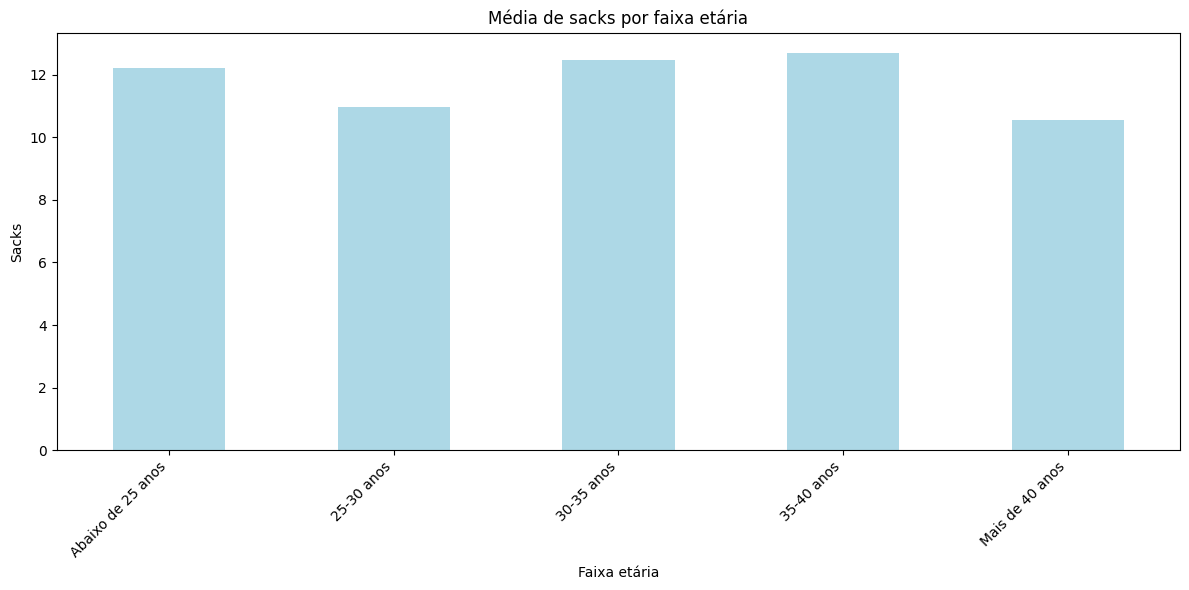

In [62]:
# Plotando gráfico de barras com a média de sacks  por faixa etária
plt.figure(figsize=(12,6))
media_sack_faixa_etaria.plot(kind='bar', color='lightblue')
plt.title('Média de sacks por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Sacks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [63]:
# Calculando a média de interceptações por faixa etária
media_int_faixa_etaria = data.groupby('Faixas', observed=False)['Int'].mean()
media_int_faixa_etaria

Faixas
Abaixo de 25 anos    4.575758
25-30 anos           4.137996
30-35 anos           5.221388
35-40 anos           5.420792
Mais de 40 anos      4.642857
Name: Int, dtype: float64

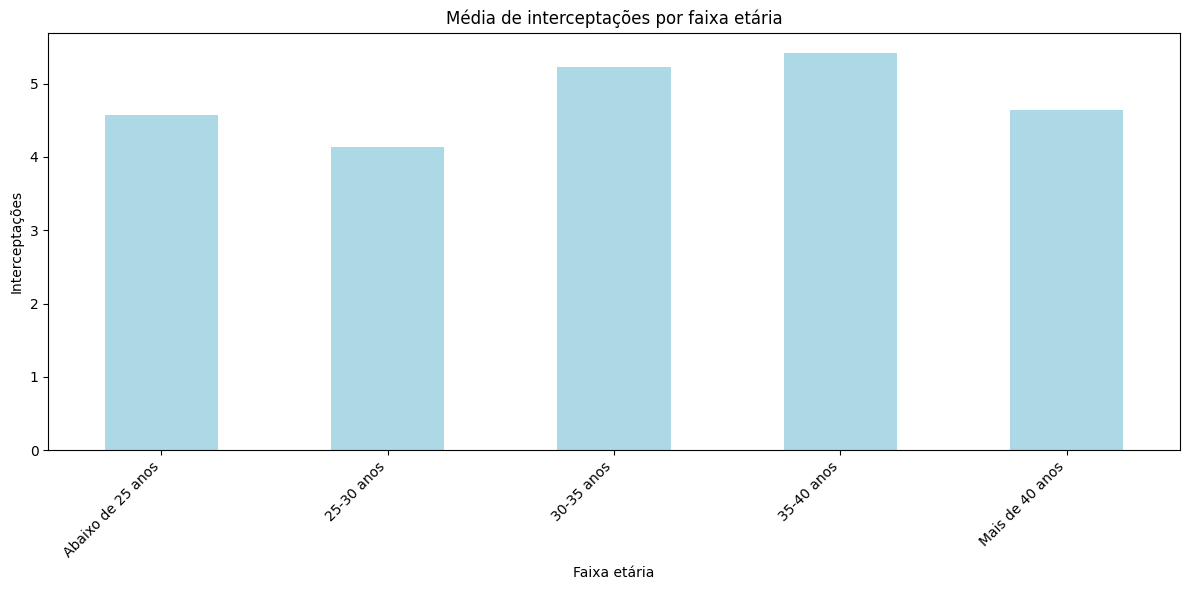

In [65]:
# Plotando gráfico de barras com a média de interceptações por faixa etária
plt.figure(figsize=(12,6))
media_int_faixa_etaria.plot(kind='bar', color='lightblue')
plt.title('Média de interceptações por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Interceptações')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
# Calculando o top 10 QBS de jardas passadas
top_10_qbs = data.groupby('Player')['Yds'].sum().nlargest(10)
top_10_qbs

Player
Tom Brady             84402
Drew Brees            75935
Matt Ryan             62792
Ben Roethlisberger    60934
Philip Rivers         60288
Matthew Stafford      60012
Aaron Rodgers         58837
Peyton Manning        55613
Eli Manning           53687
Russell Wilson        46723
Name: Yds, dtype: int64

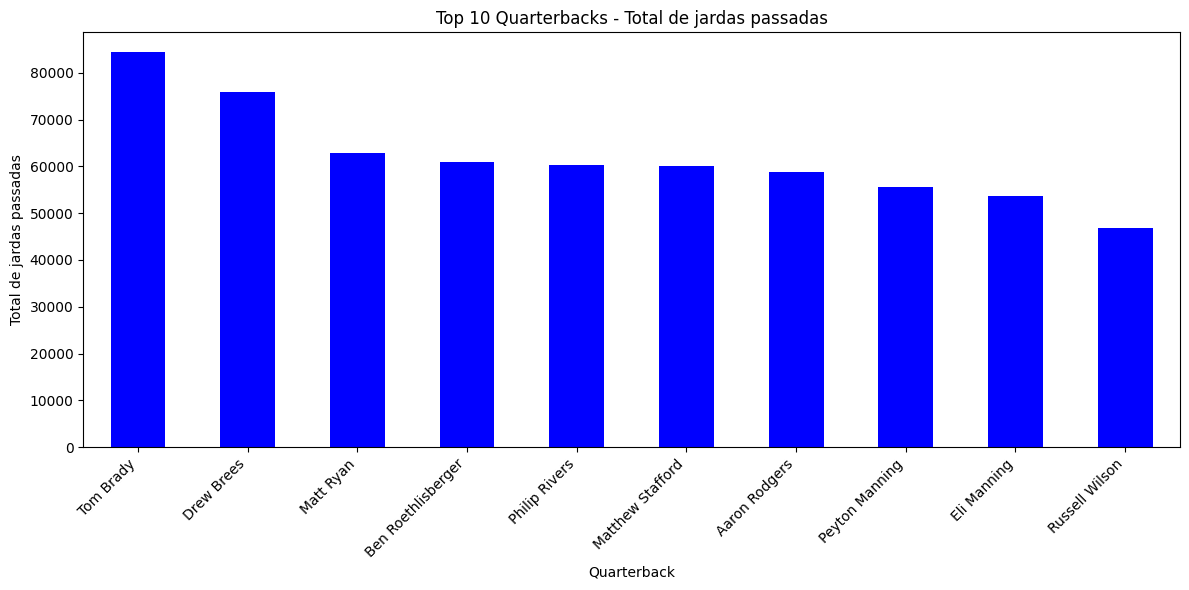

In [37]:
# Plotando gráfico com o top 10 de QBs com mais jardas passadas
plt.figure(figsize=(12,6))
top_10_qbs.plot(kind='bar', color='blue')
plt.title('Top 10 Quarterbacks - Total de jardas passadas')
plt.xlabel('Quarterback')
plt.ylabel('Total de jardas passadas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
# Calculando o top 10 QBs com mais passes para touchdown
top_10_qbs_tds = data.groupby('Player')['TD'].sum().nlargest(10)
top_10_qbs_tds

Player
Tom Brady             599
Drew Brees            543
Aaron Rodgers         474
Peyton Manning        423
Philip Rivers         400
Ben Roethlisberger    386
Matt Ryan             381
Matthew Stafford      381
Russell Wilson        360
Eli Manning           343
Name: TD, dtype: int64

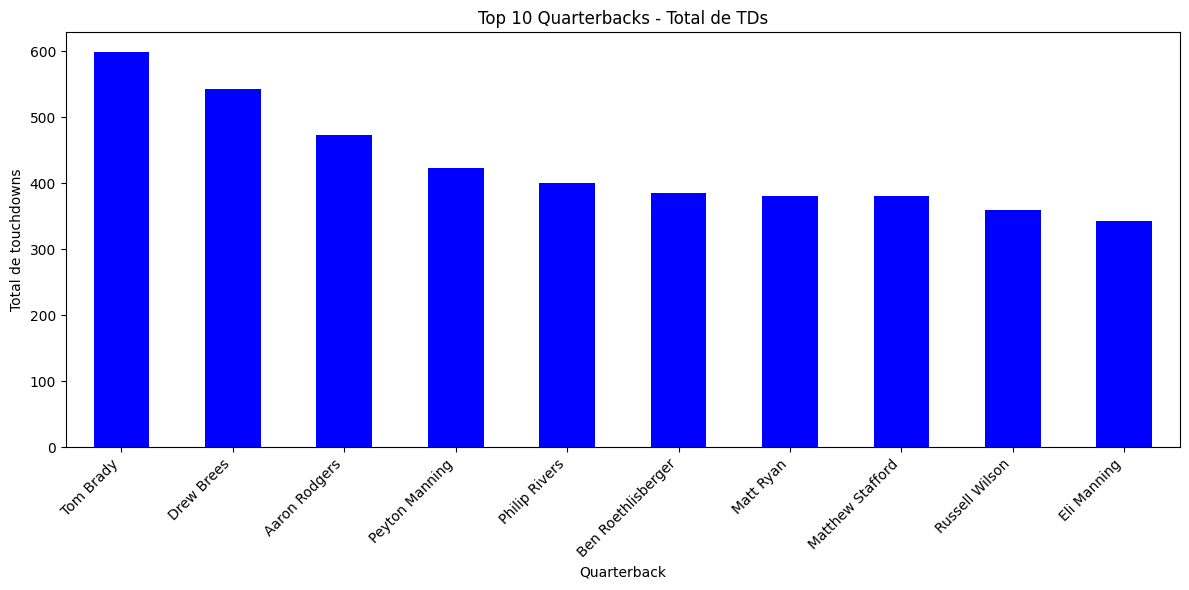

In [35]:
# Plotando gráfico com o top 10 de QBs com mais touchdowns
plt.figure(figsize=(12,6))
top_10_qbs_tds.plot(kind='bar', color='blue')
plt.title('Top 10 Quarterbacks - Total de TDs')
plt.xlabel('Quarterback')
plt.ylabel('Total de touchdowns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [33]:
# Calculando o top 10 QBs com mais interceptações
top_10_qbs_int = data.groupby('Player')['Int'].sum().nlargest(10)
top_10_qbs_int

Player
Drew Brees            225
Eli Manning           224
Tom Brady             204
Ben Roethlisberger    200
Philip Rivers         194
Matthew Stafford      191
Matt Ryan             183
Peyton Manning        179
Ryan Fitzpatrick      169
Carson Palmer         167
Name: Int, dtype: int64

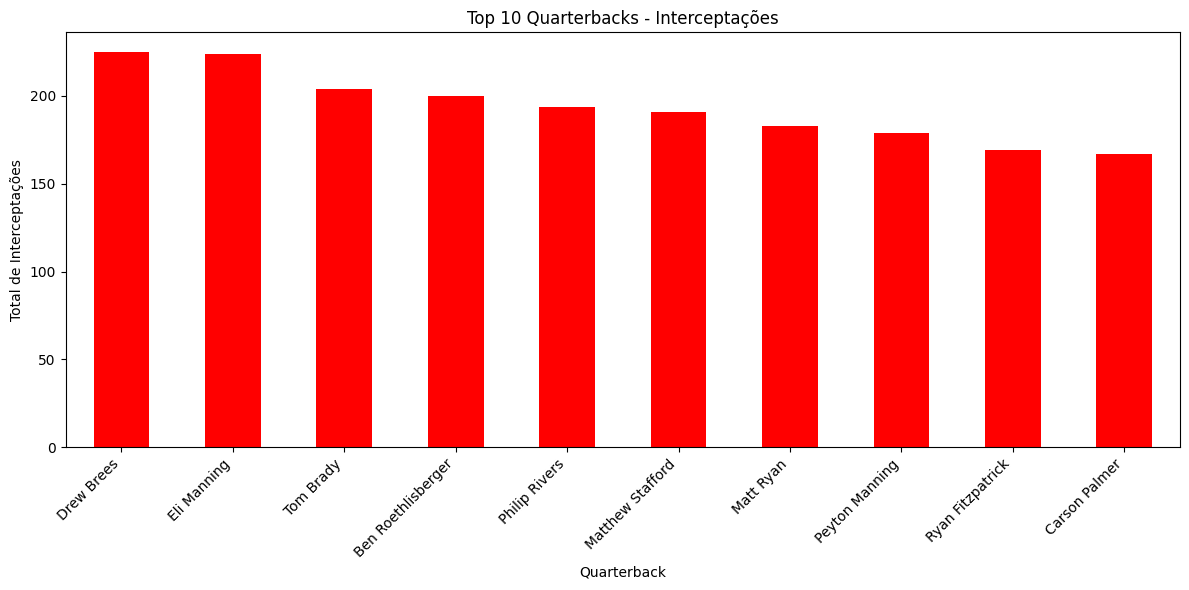

In [34]:
# Plotando gráfico com o top 10 de QBs com mais interceptações
plt.figure(figsize=(12,6))
top_10_qbs_int.plot(kind='bar', color='red')
plt.title('Top 10 Quarterbacks - Interceptações')
plt.xlabel('Quarterback')
plt.ylabel('Total de Interceptações')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [41]:
# Calculando o top 10 QBs com mais jardas perdidas por sacks
top_10_qbs_sack = data.groupby('Player')['Sk'].sum().nlargest(10)
top_10_qbs_sack

Player
Russell Wilson        572
Tom Brady             544
Aaron Rodgers         529
Ben Roethlisberger    507
Matthew Stafford      504
Matt Ryan             488
Ryan Tannehill        447
Philip Rivers         442
Alex Smith            415
Drew Brees            404
Name: Sk, dtype: int64

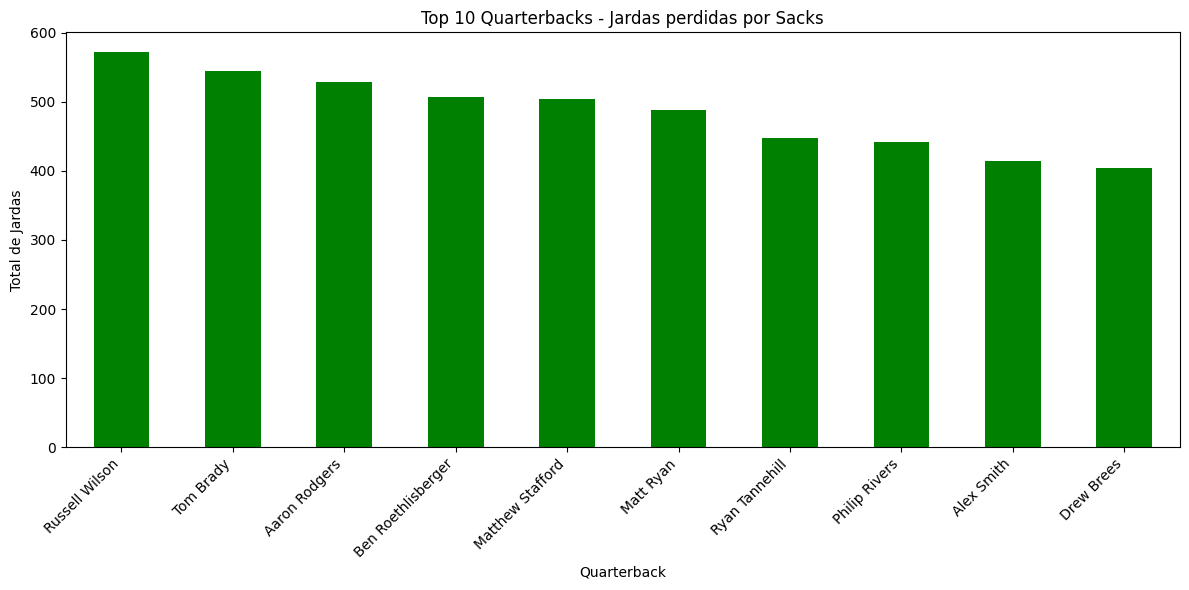

In [40]:
# Plotando gráfico com o top 10 de QBs com mais sacks
plt.figure(figsize=(12,6))
top_10_qbs_sack.plot(kind='bar', color='green')
plt.title('Top 10 Quarterbacks - Jardas perdidas por Sacks')
plt.xlabel('Quarterback')
plt.ylabel('Total de Jardas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [46]:
# Agrupando os dados por jogador e calculando a média de 'Yds' e 'Rate'
agg_yds_rate = data.groupby('Player').agg({'Yds': 'sum', 'Rate': 'mean'})
agg_yds_rate

,Yds,Rate
Player,,
A.J. Brown,0,39.600000
A.J. Feeley,3937,88.000000
A.J. McCarron,1211,78.585714
Aaron Brooks,18747,76.083333
Aaron Rodgers,58837,90.768421
...,...,...
Woodrow Dantzler,0,39.600000
Zach Mettenberger,2347,75.050000
Zach Pascal,0,39.600000


In [66]:
# Filtrando jogadores com mais de 2000 jardas
filtro_2000_jardas = grouped_data[grouped_data['Yds'] >= 2000]

In [67]:
# Obtendo os 10 maiores valores de 'Rate'
top_10_qb_rate = filtro_1000_jardas['Rate'].nlargest(10)
top_10_qb_rate

Player
Brock Purdy        111.100000
C.J. Stroud        100.800000
Russell Wilson     100.007692
Tony Romo           99.570000
Dak Prescott        99.422222
Patrick Mahomes     99.075000
Drew Brees          98.931579
Jake Browning       98.400000
Peyton Manning      98.092308
Lamar Jackson       97.228571
Name: Rate, dtype: float64

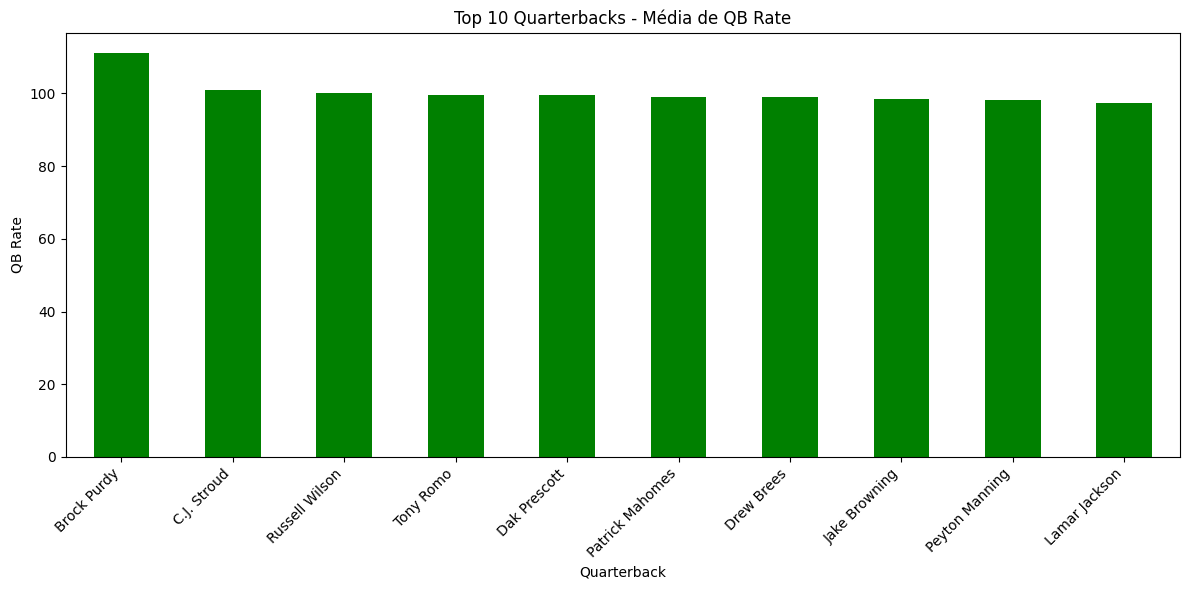

In [60]:
# Plotando gráfico com o top 10 de QBs com maior média de QB Rate
plt.figure(figsize=(12,6))
top_10_qb_rate.plot(kind='bar', color='green')
plt.title('Top 10 Quarterbacks - Média de QB Rate')
plt.xlabel('Quarterback')
plt.ylabel('QB Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()